In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0,
                     index_col = 0,
                     parse_dates = True,
                     na_values=-99.99)

In [3]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [4]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [5]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [6]:
returns = returns / 100
returns.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [7]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [8]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod() ** (1 / n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [9]:
annualized_return = (return_per_month + 1) ** 12 - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [10]:
returns.index = pd.to_datetime(returns.index, format='%Y%m')
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [11]:
returns.loc['1999':'2015']

,SmallCap,LargeCap
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [12]:
def get_annualized_volatility(r):
    """
    Calculate annualized volatility for the given returns
    """
    annualized_vol = r.std() * np.sqrt(12)
    return annualized_vol
    

def get_annualized_return(r):
    """
    Calculate annualized return for the given returns
    """
    n_months = r.shape[0]
    return_per_month = (r + 1).prod() ** (1 / n_months) - 1
    annualized_return = (return_per_month + 1) ** 12 - 1
    return annualized_return

In [13]:
get_annualized_volatility(returns)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [14]:
get_annualized_return(returns)

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [15]:
XXI_century_returns = returns.loc['1999':'2015']
get_annualized_return(XXI_century_returns)

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [16]:
get_annualized_volatility(XXI_century_returns)

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

In [17]:
import edhec_risk_kit as erk

In [18]:
XXI_century_returns_small_cap = XXI_century_returns['SmallCap']
XXI_century_returns_small_cap_drawdown = erk.drawdown(XXI_century_returns_small_cap)
XXI_century_returns_small_cap_drawdown

,Wealth,Peaks,Drawdown
1999-01,1111.400000,1111.400000,0.000000
1999-02,1067.055140,1111.400000,-0.039900
1999-03,1034.189842,1111.400000,-0.069471
1999-04,1119.407085,1119.407085,0.000000
1999-05,1168.101293,1168.101293,0.000000
...,...,...,...
2015-08,6698.386200,7558.245112,-0.113764
2015-09,6289.784642,7558.245112,-0.167825
2015-10,6531.941351,7558.245112,-0.135786
2015-11,6639.718383,7558.245112,-0.121526


<AxesSubplot:>

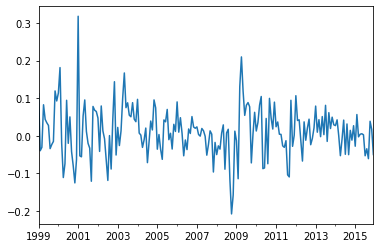

In [19]:
XXI_century_returns_small_cap.plot()

<AxesSubplot:>

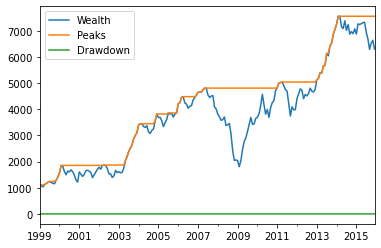

In [20]:
XXI_century_returns_small_cap_drawdown.plot()

In [21]:
XXI_century_returns_small_cap_drawdown['2008':'2009']

,Wealth,Peaks,Drawdown
2008-01,3813.812687,4810.164013,-0.207135
2008-02,3710.839744,4810.164013,-0.228542
2008-03,3578.733849,4810.164013,-0.256006
2008-04,3603.784986,4810.164013,-0.250798
2008-05,3707.934372,4810.164013,-0.229146
2008-06,3377.557420,4810.164013,-0.297829
2008-07,3402.551345,4810.164013,-0.292633
2008-08,3461.075228,4810.164013,-0.280466
2008-09,3058.552179,4810.164013,-0.364148
2008-10,2422.373326,4810.164013,-0.496405


In [22]:
XXI_century_returns_large_cap = XXI_century_returns['LargeCap']
XXI_century_returns_large_cap_drawdown = erk.drawdown(XXI_century_returns_large_cap)
XXI_century_returns_large_cap_drawdown.min()

Wealth       721.706638
Peaks       1015.300000
Drawdown      -0.552735
dtype: float64

<AxesSubplot:>

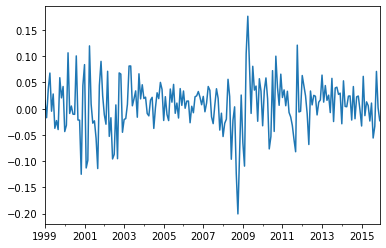

In [23]:
XXI_century_returns_large_cap.plot()

<AxesSubplot:>

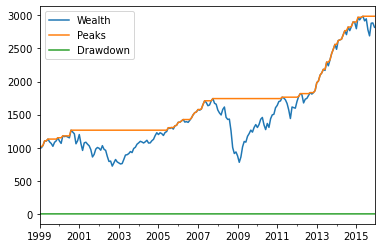

In [24]:
XXI_century_returns_large_cap_drawdown.plot()

In [25]:
XXI_century_returns_large_cap_drawdown['2008':'2009']

,Wealth,Peaks,Drawdown
2008-01,1568.777383,1742.204449,-0.099545
2008-02,1525.165372,1742.204449,-0.124577
2008-03,1494.662065,1742.204449,-0.142086
2008-04,1578.363140,1742.204449,-0.094043
2008-05,1614.981165,1742.204449,-0.073024
2008-06,1459.296981,1742.204449,-0.162385
2008-07,1427.338377,1742.204449,-0.180729
2008-08,1432.334061,1742.204449,-0.177861
2008-09,1255.011104,1742.204449,-0.279642
2008-10,1003.255877,1742.204449,-0.424146


In [26]:
hfi = erk.get_hfi_returns()

In [27]:
hfi_last = hfi['2009':]
hfi_last

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


<AxesSubplot:title={'center':'EDHEC Hedge Fund Indicies: VaR'}>

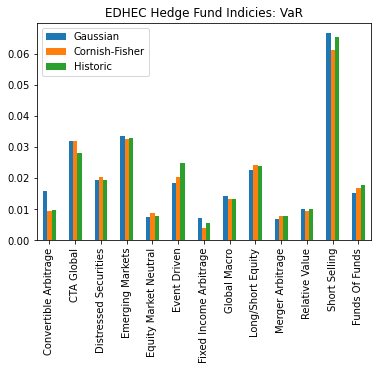

In [28]:
var_list = [erk.var_gaussian(hfi_last), erk.var_gaussian(hfi_last, modified=True), erk.var_historic(hfi_last)]
comparision = pd.concat(var_list, axis=1)
comparision.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparision.plot.bar(title="EDHEC Hedge Fund Indicies: VaR")

In [29]:
erk.skewness(hfi_last).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [31]:
erk.kurtosis(hfi['2000':]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64